In [1]:
# import useful packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Set plots to be embedded inline
%matplotlib inline

# Set better dpi displays on larger screen resolutions
%config InlineBackend.figure_format = 'retina'

# Set default plot styles and color palette
plt.style.use('default')
color_list = sns.color_palette('tab20c')

In [2]:
# Load the dataframe for analysis
df = pd.read_csv('./prosper_loan_clean.csv')

In [3]:
# -- Convert prosper rating and income range to ordered category types

# Store the correct variable orders in a dictionary
order_dict = {'ProsperRating': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
              'IncomeRange': ['$0', '$1-24,999', '$25,000-49,999', 
                              '$50,000-74,999', '$75,000-99,999', '$100,000+']}

# Assign each column to the proper order
for key, value in order_dict.items():
    correct_order = pd.api.types.CategoricalDtype(categories=value, ordered=True)
    df[key] = df[key].astype(correct_order)

# How Prosper Rating may Influence Loan Favorability

In [4]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here show or hide code for the entire presentation"></form>''')

## About Prosper

Prosper is a peer-to-peer lending platform that provides personal loans to borrowers with fair or good credit. To qualify applicants, the company uses a proprietary rating system that considers data points like employment status, income, and debt-to-income ratio. Borrowers are then assigned a Prosper score, which investors use to decide on loans to fund.

This investigation explores the motivations behind loans taken through Prosper while identifying how prosper ratings may influence loan favorability.

## The Dataset
The dataset comprises information on 113,937 Prosper loans described with 81 variables. The variables include loan amount, loan interest rate, borrower employment status and income, among many others. After wrangling and selecting key variables, 83,982 records and 17 variables remained for analysis.

## Borrower Motivations

Different people have different notions of debt and borrowing. While someone might consider it okay to borrow money for all things big and small, others might be strictly against borrowing of any sort. However, certain situations in life leave no option but to take a loan. Analysis of Prosper loan data reveals the motivation of its audience towards loans.

In [5]:
# Compute percentage count of each listing category
median_info = df.groupby('ListingCategory')['LoanOriginalAmount'].median()

# Compute median loan amount per listing category
proportions_info = df.ListingCategory.value_counts(normalize=True).sort_values()

# Merge both information into a single dataframe
median_df = median_info.to_frame()
median_df['proportions'] = proportions_info
median_df = median_df.sort_values(by='proportions')

# Filter out unclear listing categories
known_reasons_df = median_df[(median_df.index !='Other') & (median_df.index !='Not Available')]

# Create formatted proportion labels for graph annotations
labels = (known_reasons_df['proportions']*100).round(1)

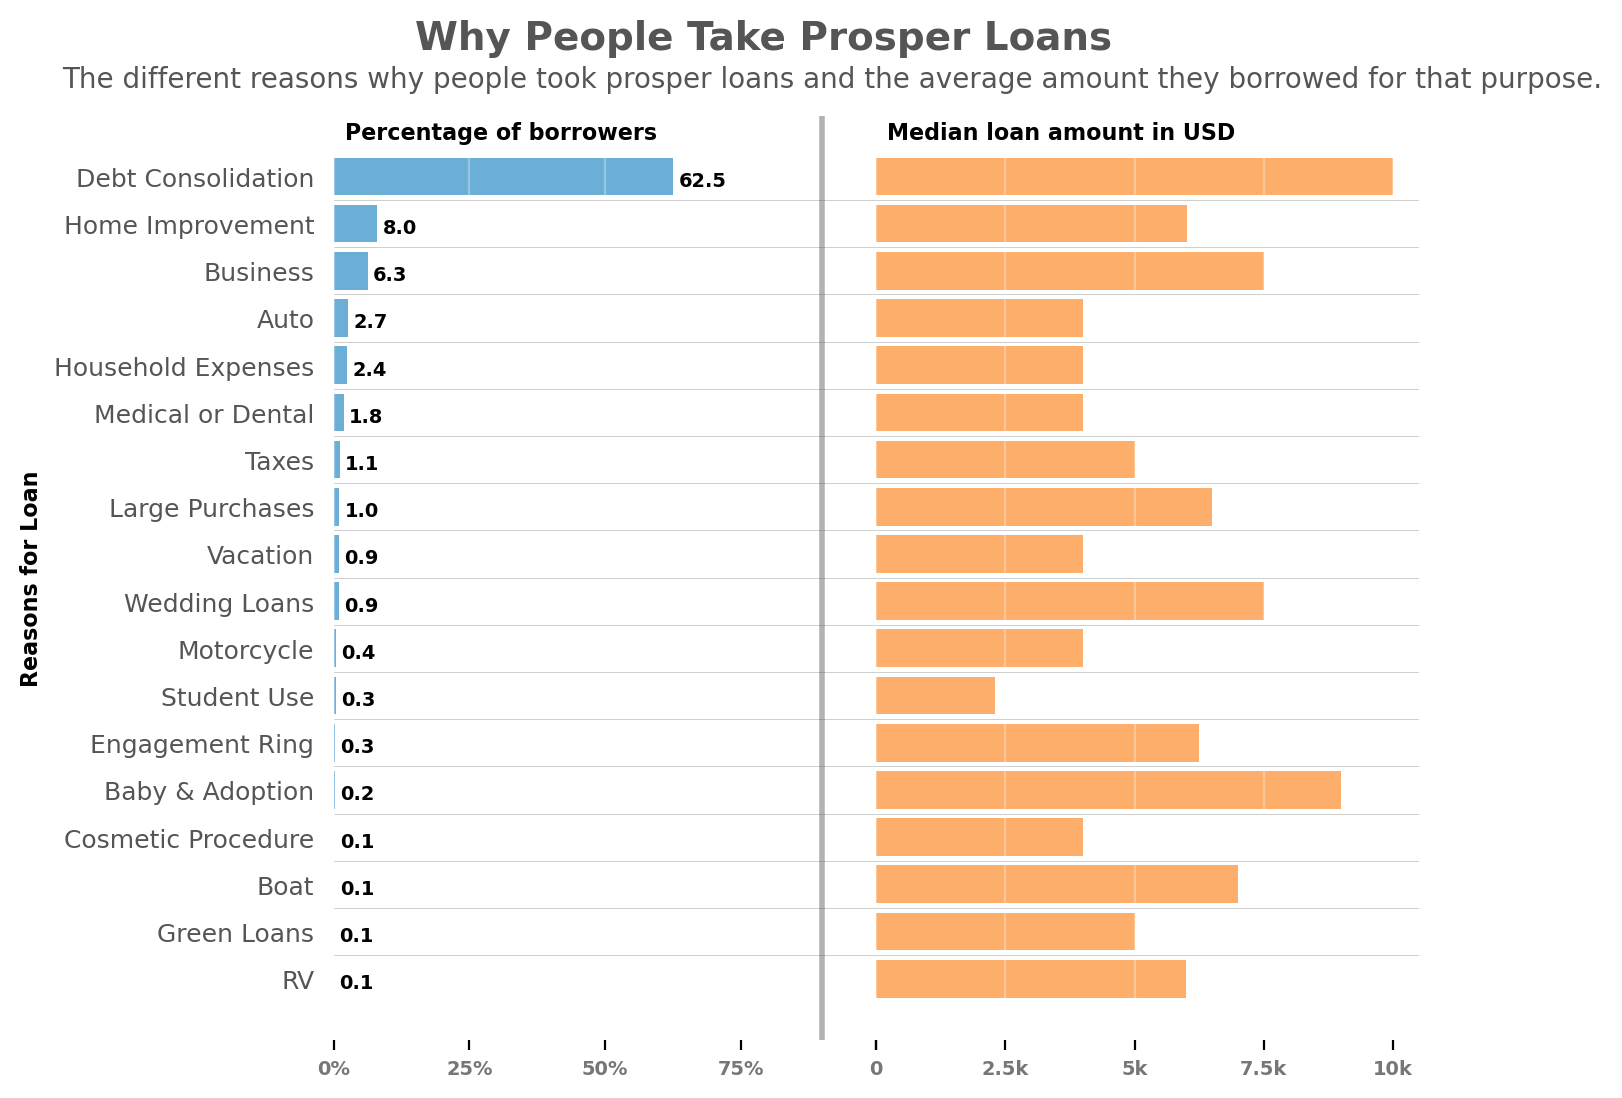

In [6]:
fig = plt.figure(figsize=(7, 6))

# Create and configure left plot
plt.subplot(1,2,1)
plt.barh(known_reasons_df.index, known_reasons_df['proportions'], color=color_list[1])
plt.xticks(np.arange(0, 1.2, 0.25), ['0%', '25%', '50%', '75%', ''])
plt.yticks(fontsize=9, color='#555')
plt.ylabel('Reasons for Loan', fontweight='bold', fontsize=8)

# Anotate plot name and bar percentages
plt.text(x=0.02, y=17.8, s='Percentage of borrowers', fontweight='bold', fontsize=8)
for yval, xval, label in zip(range(labels.size), known_reasons_df['proportions'], labels):
    plt.text(x=xval+0.01, y=yval-0.2, s=str(label), 
             fontsize=7, fontweight='bold')

# Configure title and subtitle
plt.text(x=0.15, y=19.7, s='Why People Take Prosper Loans', fontsize=14, fontweight='bold', color='#555')
plt.text(x=-0.5, y=18.9, fontsize=10, color='#555',
         s='The different reasons why people took prosper loans ' +
         'and the average amount they borrowed for that purpose.')

# Demarcate left and right plot
plt.axvline(x= 0.9, color='grey', alpha=0.6, linewidth=2)

# Create and configure right plot
plt.subplot(1,2,2)
plt.barh(known_reasons_df.index, known_reasons_df['LoanOriginalAmount'], color=color_list[6])
plt.xticks(np.arange(0, 11000, 2500), ['0','2.5k', '5k', '7.5k', '10k'])
plt.yticks(alpha=0)

# Annotate right plot name
plt.text(x= 200, y=17.8, s='Median loan amount in USD', fontweight='bold', fontsize=8)

# Configure common style attrbutes
for axes in fig.get_axes():
    plt.sca(axes)
    sns.despine(left=True, bottom=True)
    plt.tick_params(left=False)
    plt.xticks(fontsize=7, color='#777', fontweight='bold')
    plt.grid(axis='x', alpha=0.3, color='white')
    
    for i in np.arange(0.5, 17, 1):
        plt.axhline(y=i, linewidth=0.2, alpha=0.5, color='#555')
    
# Remove space berween subplots
plt.subplots_adjust(wspace=0, hspace=0);

### Why do people take Prosper loans?
From the chart above, over 60% of borrowers seek prosper loans to consolidate debt, or repay existing loans. This proportion greatly exceeds those who seek loans for expected reasons like Business, Home improvement, Auto related and Medical reasons. Debt consolidation also accounts for the highest amount loaned on average (about 10,000 USD).

Asides business purposes, people seem to depend on huge loans to finance weddings, child adoptions, boat acquisitions, and the purchase of engagement rings.

## Lets Discuss Loan Favorability
Prosper assigns loan requests with letter grades ranging from HR (high risk) to AA (best value). The lower the grade, the higher the risk associated with a loan. Exploration reveals how these grades may influence the annual interest rate a borrower pays for a loan.

### Prosper rating and Interest rate (Borrower APR)

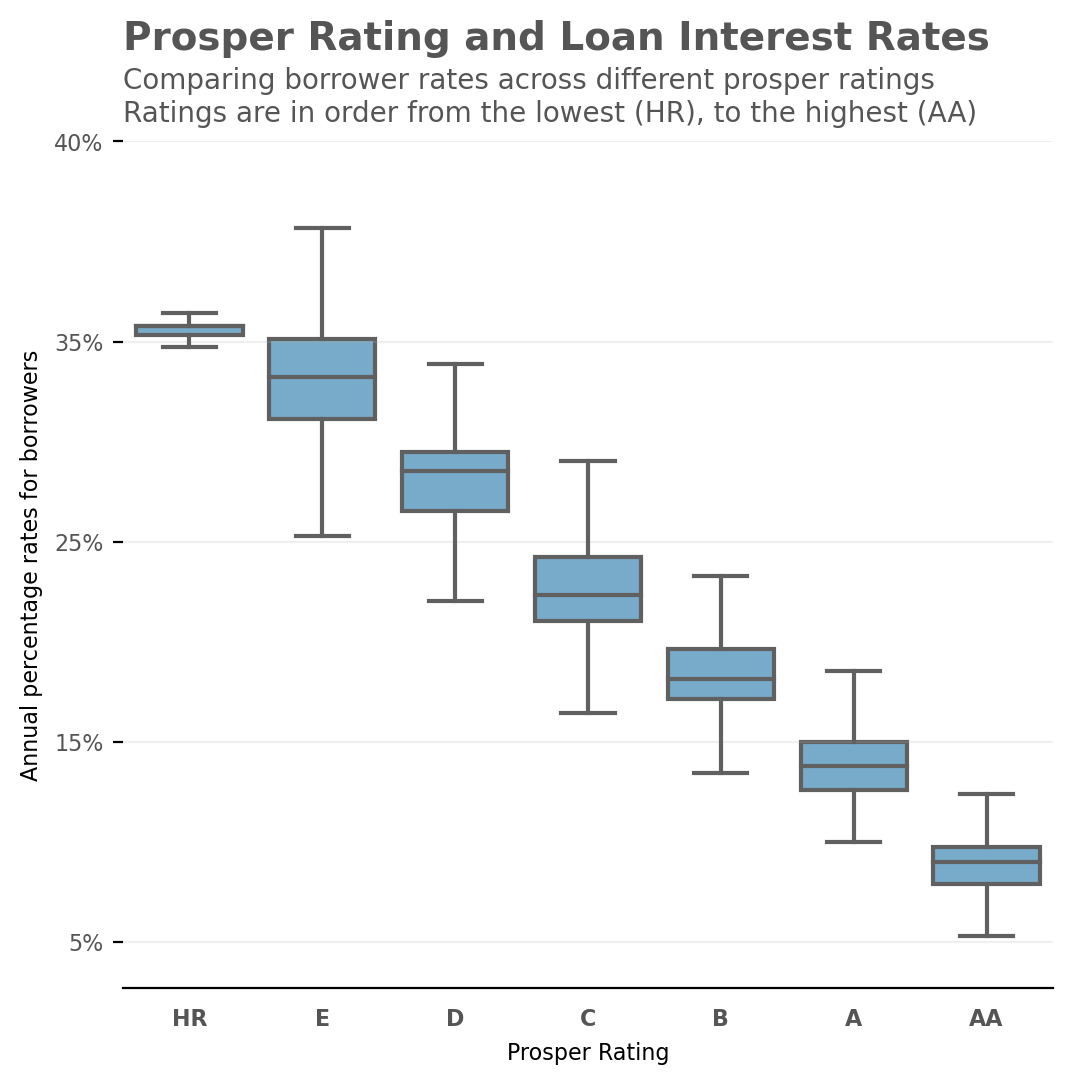

In [7]:
# Create plot area and boxplot
plt.figure(figsize=(6, 5.5))
sns.boxplot(data=df, x='ProsperRating', y='BorrowerAPR', color = color_list[1], fliersize=0)

# Configure ticks, labels and annotations
plt.tick_params(bottom=False)
plt.xticks(fontsize=8, color='#555', fontweight='bold')
plt.yticks(np.arange(0.05, 0.5, 0.1), ['5%', '15%', '25%', '35%', '40%'], fontsize=8, color='#555')
plt.xlabel('Prosper Rating', fontsize=8)
plt.ylabel('Annual percentage rates for borrowers', fontsize=8)
plt.title('Prosper Rating and Loan Interest Rates',  fontsize=14,
          fontweight='bold', color='#555', loc='left', pad=33)
plt.text(x=-0.5, y=0.46, color='#555',
         s='''Comparing borrower rates across different prosper ratings\nRatings are in order from the lowest (HR), to the highest (AA)''')

# Configure plot grid and spines
plt.grid(axis='y', alpha=0.2)
sns.despine(left=True);

High Prosper ratings correlate with loan favorability. The plot above indicates that high-rated borrowers (**B - AA**) typically take loans at low interest rates, while poorly rated borrowers (**HR - C**) pay higher interest rates on their loans. The publicized interest rate for prosper loans is **7%** to **35%**. Highly rated borrowers enjoy loans, while paying in the lower boundary of the publicized interest rates.

_This observation springs up further questions. How much can someone with a higher rating borrow, at low interest rates, when compared to someone with lower rating?_ A combined analysis of Prosper rating, interest rate, and loan amount could expose the difference in borrowing power, between high and low-rated borrowers.
### Evaluating Prosper ratings, Interest Rates and Loan Amount

In [8]:
# Calculate the mean of all the APR values
mean_APR = df.BorrowerAPR.mean()
# Convert to the nearest multiple of 0.05
mean_APR = round(mean_APR/0.05, 0) * 0.05
# Calculate the mean of all the Loan amounts
mean_loan_amount = df.LoanOriginalAmount.mean()
# Convert to the nearest multiple of 10,000
mean_loan_amount = round(mean_loan_amount/10000) * 10000

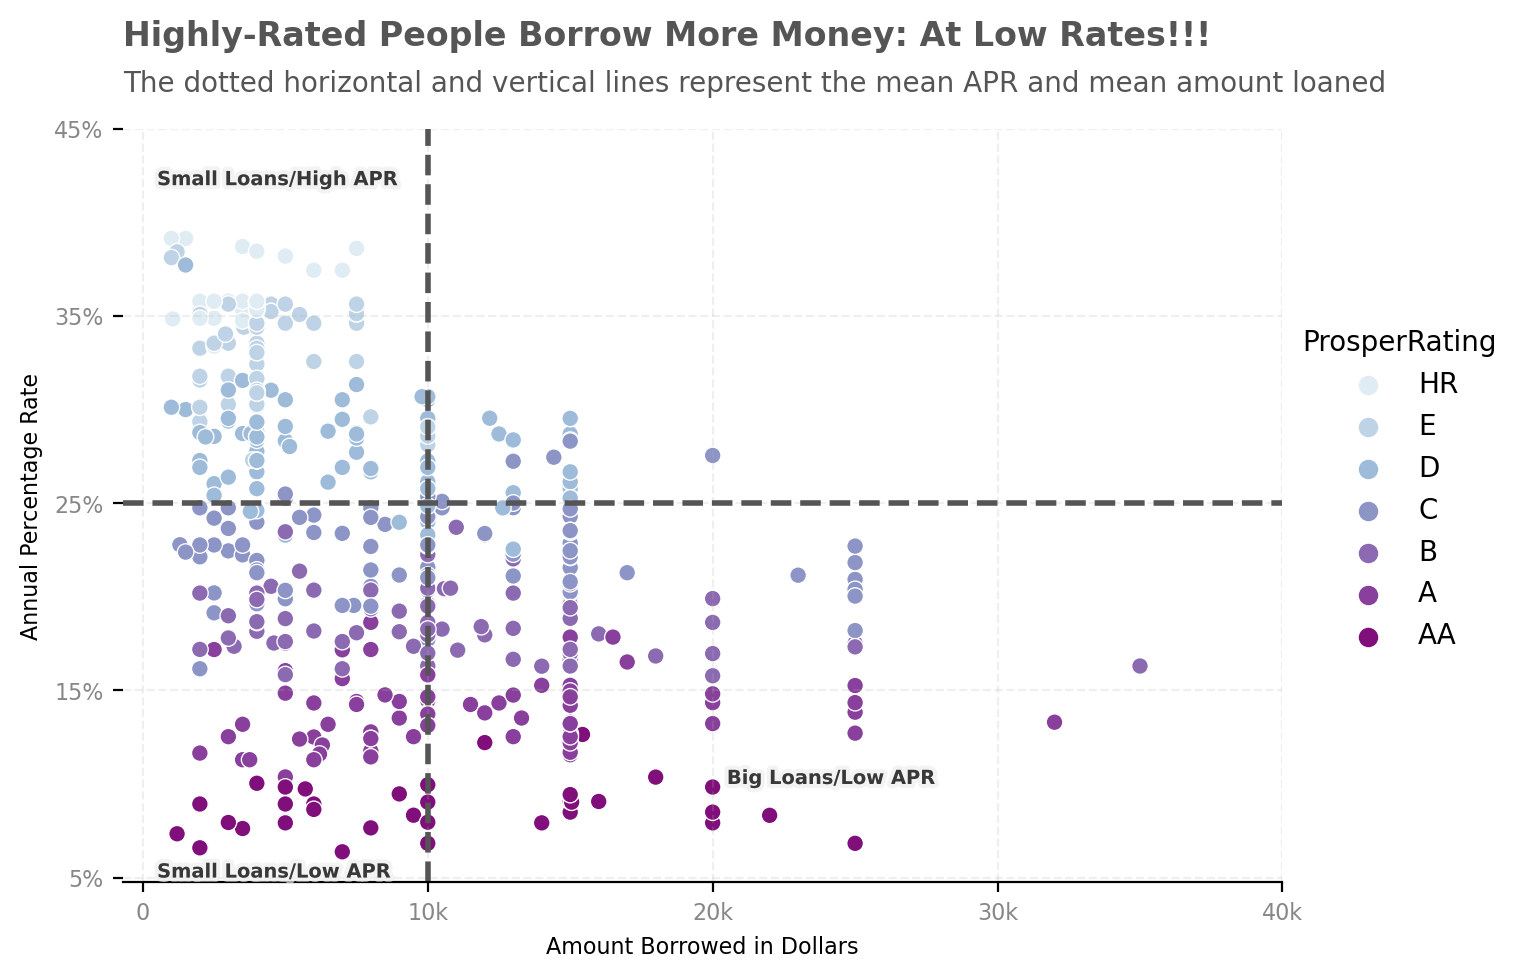

In [9]:
#Visualize interactions with a seaborn relplot
sns.relplot(data=df.sample(500, random_state=1), y='BorrowerAPR', x='LoanOriginalAmount', 
             hue='ProsperRating', palette= 'BuPu', height=4.5, aspect=1.5)
sns.despine(left=True)

# Configure x and y-axis ticks
plt.xticks(np.arange(0, 50000, 10000), ['0', '10k', '20k', '30k', '40k'],
          color='#555', alpha=0.7, fontsize=8)
plt.yticks(np.arange(0.05, 0.5, 0.1), ['5%', '15%', '25%', '35%', '45%'],
          color='#555', alpha=0.7, fontsize=8)

# Configure graph labels and grid
plt.xlabel('Amount Borrowed in Dollars', fontsize=8)
plt.ylabel('Annual Percentage Rate', fontsize=8)
plt.grid(alpha=0.2, linestyle='--')

# Divide scatter plot into four distinct grids based on meanAPR and mean loan amount
plt.axhline(y=mean_APR, linewidth=2, color='#555', linestyle='--')
plt.axvline(x=mean_loan_amount, linewidth=2, color='#555', linestyle='--')

# Include Quadrant annotations
plt.text(x=20500, y=0.10, s='Big Loans/Low APR', fontsize=7, fontweight='bold', color='#000', alpha=0.7,
         path_effects=[pe.withStroke(linewidth=3, foreground="#eee")])
plt.text(x=500, y=0.05, s='Small Loans/Low APR', fontsize=7, fontweight='bold', color='#000', alpha=0.7,
        path_effects=[pe.withStroke(linewidth=3, foreground="#eee")])
plt.text(x=500, y=0.42, s='Small Loans/High APR', fontsize=7, fontweight='bold', color='#000', alpha=0.7,
        path_effects=[pe.withStroke(linewidth=3, foreground="#eee")])

# Title and subtitle
plt.title('Highly-Rated People Borrow More Money: At Low Rates!!!', 
          pad=30, loc='left', fontweight='bold', color='#555')
plt.text(x=-700, y=0.47, color='#555',
         s='''The dotted horizontal and vertical lines represent the mean APR and mean amount loaned''');

The plot above shows that borrowers with high prosper ratings typically borrow both small and large amounts while maintaining low interest rates: this gives them a higher borrowing power on the platform.

With the average borrower rate at **25%**, and the average amount loaned on the platform at **10,000 USD**, low rated borrowers pay higher than average rates, even when getting small loans. This can be observed from the concentration of the group at the top-left section of the plot.

## How Does Prosper Maintain the Balance?
To avoid excesses. The loan favorability enjoyed by high-rated borrowers may need some degree of regulation. Platforms must come up with tailored approaches of dealing with customer segments, especially those with diverging needs. Prosper may have realized this need: to creatively control borrowing power for highly-rated borrowers, while encouraging low-rated borrowers with long-term loans. Exploring an interesting dichotomy reveals this in detail.
### The change in relationship between Prosper rating and loan interest rates

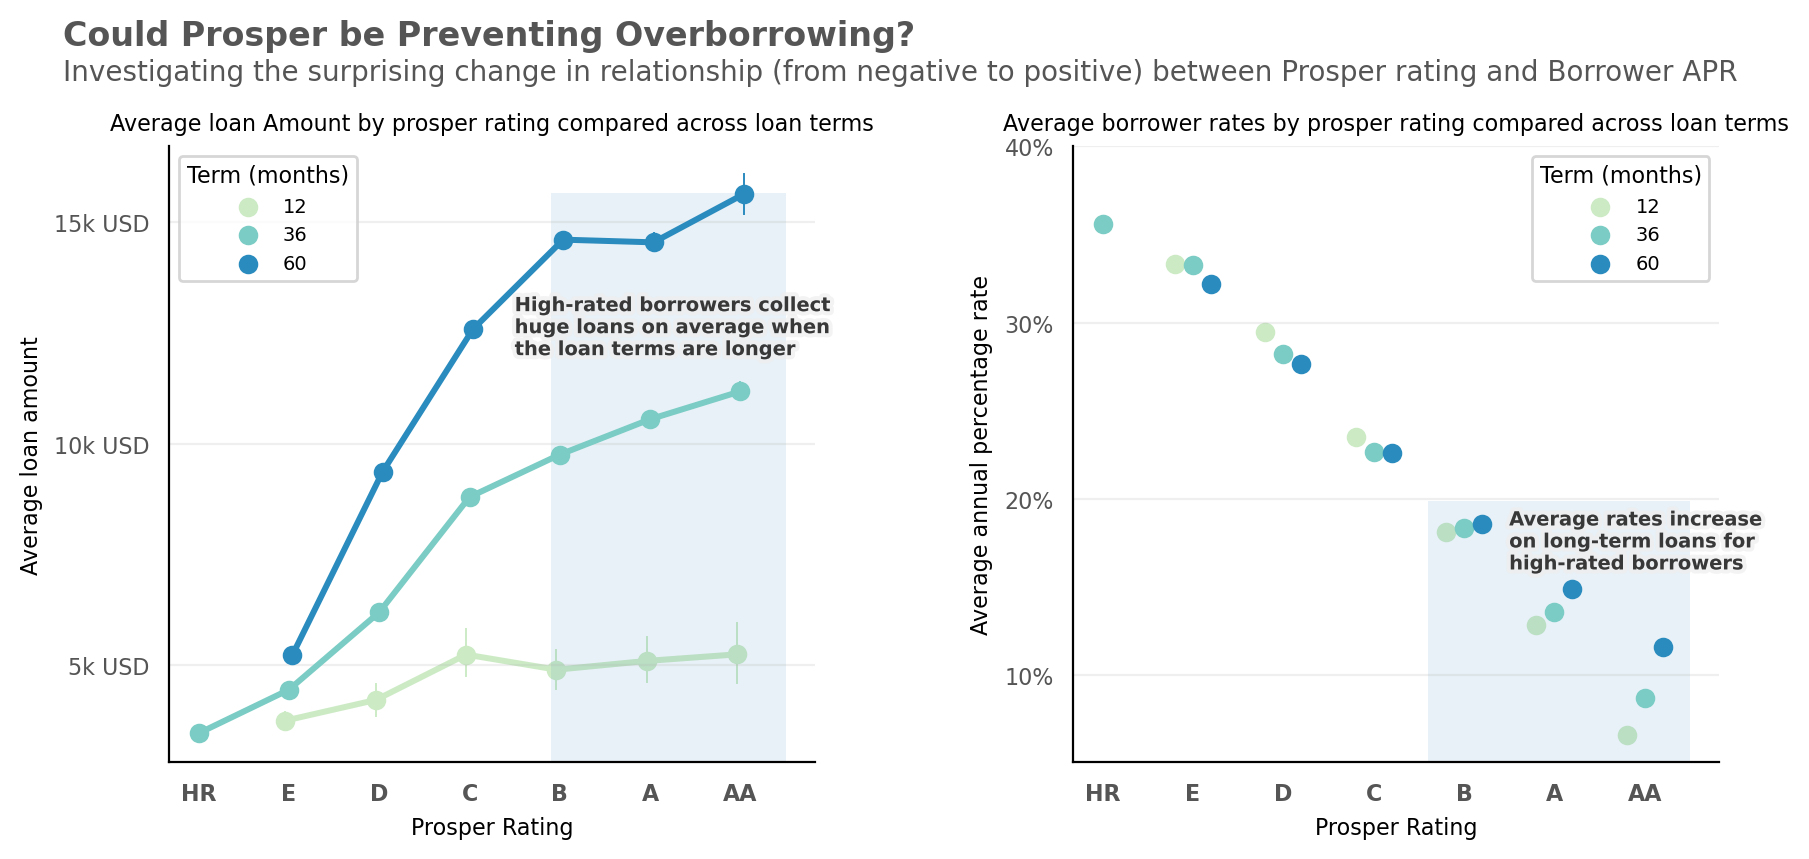

In [10]:
# Create a list of columns to plot on the y-axis
y_columns = ['LoanOriginalAmount','BorrowerAPR']

fig = plt.figure(figsize=(10, 4))

# Create and configure plot for prosper rating and loan amount
plt.subplot(1, 2, 1)
sns.pointplot(data=df, x='ProsperRating', y=y_columns[0], hue='Term', linestyles='-', 
              palette= 'GnBu', dodge=True, scale=0.8, errwidth=0.7)

# Configure axis ticks labels and title for left plot
plt.yticks(np.arange(5e3, 2e4, 5e3), ['5k USD', '10k USD', '15k USD'], color='#555', fontsize=8)
plt.ylabel('Average loan amount', fontsize=8)
plt.title('Average loan Amount by prosper rating compared across loan terms', 
          fontsize=8, loc='center')

# Include key annotation of plot insights in the left plot
plt.axvspan(xmin=3.9, xmax=6.5, alpha=0.1, ymax=0.925)
plt.text(x=3.5, y=12000, fontsize=7, fontweight='bold', alpha=0.7,
         s='High-rated borrowers collect\nhuge loans on average when\nthe loan terms are longer',
         path_effects=[pe.withStroke(linewidth=3, foreground="#eee")])


# Create and configure plot for prosper rating and Borrower APR
plt.subplot(1, 2, 2)
sns.pointplot(data=df, x='ProsperRating', y=y_columns[1], hue='Term', linestyles='', 
              palette= 'GnBu', dodge=0.4, scale=0.8, errwidth=0.7)

# Configure axis ticks labels and title for right plot
plt.yticks(np.arange(0.1, 0.4, 0.1), ['10%', '20%', '30%', '40%'], color='#555', fontsize=8)
plt.ylabel('Average annual percentage rate', fontsize=8)
plt.title('Average borrower rates by prosper rating compared across loan terms', 
          fontsize=8, loc='center')

# Include key annotation of plot insights in the right plot
plt.axvspan(xmin=3.6, xmax=6.5, alpha=0.1, ymax=0.425)
plt.text(x=4.5, y=0.16, fontsize=7, fontweight='bold', alpha=0.7,
         s='Average rates increase\non long-term loans for\nhigh-rated borrowers',
         path_effects=[pe.withStroke(linewidth=3, foreground="#eee")])

# Set common formatting attributes for both the left and right plot
for axes in fig.get_axes():
    plt.sca(axes)
    plt.xlabel('Prosper Rating', fontsize=8)
    plt.xticks(color='#555', fontsize=8, fontweight='bold')
    plt.tick_params(bottom=False, left=False)
    plt.legend(fontsize=7, title='Term (months)', title_fontsize=8)
    plt.grid(axis='y', alpha=0.2)
    sns.despine();

# Set the Main title and subtitle for the entire figure
plt.sca(fig.get_axes()[0])
plt.text(x=-1.5, y=19000, s='Could Prosper be Preventing Overborrowing?', 
         fontsize=12, fontweight='bold', color='#555')
plt.text(x=-1.5, y=18200, fontsize=10, color='#555',
         s='Investigating the surprising change in relationship (from negative to positive) between Prosper rating and Borrower APR')

plt.subplots_adjust(wspace=0.4, hspace=0);

High-rated individuals have higher capacity to borrow more when long-term loans are involved. Coupled with the low rates they enjoy, this can easily become an avenue to exploit (_see plot above_). 

It seems Prosper may have this in control. Between the lower ratings (HR to B), borrower APR and prosper ratings are negatively correlated, similar to the common pattern. This interaction turns quickly positive within the high prosper rating group (B to AA). This is _probably_ Prosper's way of controlling overborrowing on long-term loans taken by high rated borrowers.

## Closing Fun Fact: 
### Prosper marketplace is based in California. However, Californians don't take the largest loans on average.
Although this interesting company plants its base in San Francisco, California. People from New Mexico, New Jersey, Texas, District of Columbia, Massachussetts, and Hawai, seem to get the higher loans on average, than Californians (_see plot below_).

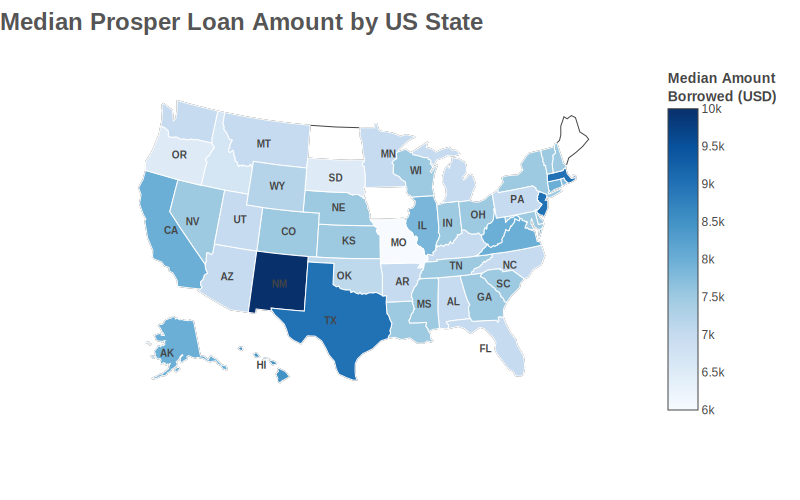

In [11]:
# Create a list of columns neccessary for successful plotting
graphing_cols = ['BorrowerState', 'BorrowerStateCode', 'Longitude', 'Latitude']

# Create a list of states with small sizes on the US map 
# Text labels wont fit into these states due to their small map size
smaller_states = ['ME', 'MH', 'MA', 'VT', 'NY', 'NJ', 'DE', 'CT', 'RI', 'NH', 
                  'MD', 'DC', 'WA', 'MI', 'ID', 'KY', 'VA', 'LA', 'WV']

# Compute the median loan amount by state, including neccessary columns for plotting
state_medians = df.groupby(graphing_cols)['LoanOriginalAmount'].median()
state_medians = state_medians.reset_index(name='MedianLoanAmount')

# Filter out the larger states into another dataframe
state_filter = state_medians[~(state_medians.BorrowerStateCode.isin(smaller_states))]

# Build a chloropleth map
fig= go.Figure()
fig = px.choropleth(
    state_medians, 
    locations='BorrowerStateCode', 
    locationmode="USA-states", 
    scope="usa", 
    color='MedianLoanAmount', 
    color_continuous_scale="Blues",
    labels={'MedianLoanAmount': '<b>Median Amount <br>Borrowed (USD)</b>'}
)

# Anotate the chloropleth map with the larger states
fig.add_scattergeo(
    lon = state_filter['Longitude'],
    lat = state_filter['Latitude'],
    text = '<b>'+state_filter['BorrowerStateCode']+'</b>',
    mode = 'text',
    textfont_color='#444', textfont_size=10
)

# Set map trace and layout properties
fig.update_traces(marker_line_color = 'white')
fig.update_layout(
    title_text = '<b>Median Prosper Loan Amount by US State<b>',
    title_font_family="Arial",
    title_font_size = 24,
    title_font_color = '#555',
    title_x=0, template=None,
    geo_landcolor = 'rgb(217, 217, 217)',
    font_family = 'Arial',
)

# Display results
fig.show('svg', width=800)

## Limitations
There was a substantial presence of missing data in this analysis. After removing missing records, only 75% of the original data remained. While this is still a good number, there will still be some degree of concern about how well we can generalize the conclusions obtained in our analysis.